<a href="https://colab.research.google.com/github/kumarmayank29/CNN-CIFAR-10/blob/main/CNN_CIFAR_10_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The dataset is comprised of 60,000 32×32 pixel color photographs of objects from 10 classes, such as frogs, birds, cats, ships, etc.with 6000 images per class. There are 50000 training images and 10000 test images. The class labels and their standard associated integer values are listed below.

0. airplane
1. automobile
2. bird
3. cat
4. deer
5. dog
6. frog
7. horse
8. ship
9. truck

These are very small images, much smaller than a typical photograph, and the dataset was intended for computer vision research.

**The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.**

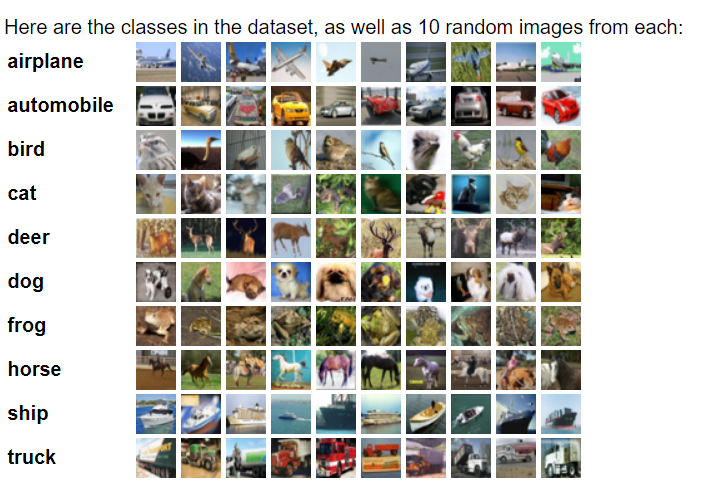


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.4.0


In [ ]:
#Additional Imports
import numpy as np
import pandas as pd
from tensorflow.keras.layers import Input,Conv2D,Flatten,Dense,Dropout,GlobalAveragePooling2D
from tensorflow.keras.models import Model

### Import the Dataset

In [ ]:
cifar10=tf.keras.datasets.cifar10
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

#Can also we written as (x_train,y_train),(x_test,y_test)=tf.keras.datasets.cifar10.load_data()

In [ ]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.cifar10.load_data()

In [ ]:
#Shape of format N*H*W*C (N-No of observation,H-Height,W-Width,C-Color)
print(x_train.shape,x_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)


### Problem with output Shape

**In cifar10 there is a problem with the output labels we want the output to be of shape (50000,) for y_train and (10000,) for y_test but currently the shape of y_train and y_test is (50000,1) and (10000,1) respectively.To overcome this problem wwe apply Flatten Function**

In [ ]:
print(y_train.shape,y_test.shape)

(50000, 1) (10000, 1)


In [ ]:
#Lets Flatten
y_train=y_train.flatten()
y_test=y_test.flatten()
print(y_train.shape,y_test.shape)

(50000,) (10000,)


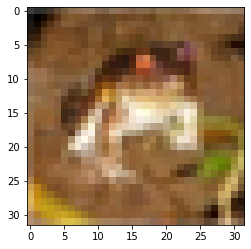

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])

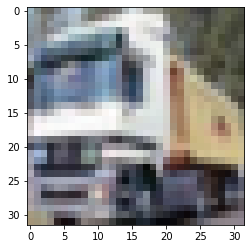

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[1],cmap='gray')

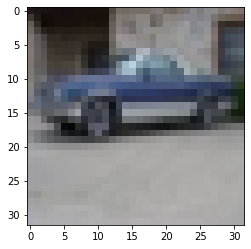

In [ ]:
plt.imshow(x_train[10000],cmap='gray')

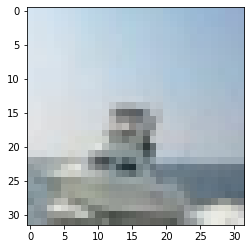

In [ ]:
plt.imshow(x_train[100],cmap='gray')


### Standardising/Scaling the Data

In [ ]:
x_train,x_test=x_train/255.0,x_test/255.0

### Find the number of Classes

In [ ]:
#Since set returns unique values only thats why set has been used to get all classes in Dataset
K=len(set(y_train))
print("Classes of Dataset",set(y_train))
print("Total Count of Classes",K)

Classes of Dataset {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Total Count of Classes 10


In [ ]:
print(x_train[0].shape)

(32, 32, 3)


###Build the Model

In [ ]:
#Build the model

i=Input(x_train[0].shape)
x=Conv2D(32,(3,3),strides=2,activation='relu')(i)
x=Conv2D(64,(3,3),strides=2,activation='relu')(x)
x=Conv2D(128,(3,3),strides=2,activation='relu')(x)
x=Flatten()(x)
x=Dropout(0.5)(x)
x=Dense(1024,activation='relu')(x) #CREATING A DENSE LAYER WITH 512 NEURONS
x=Dropout(0.2)(x)
x=Dense(K,activation='softmax')(x) #OUTPUT LAYER,K REPRESENTS NUMBER OF CLASSES

model=Model(i,x)

### Compile the Model

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )

###Fit the Model

In [ ]:
r=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=15)

Epoch 1/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7646 - accuracy: 0.3507 - val_loss: 1.4408 - val_accuracy: 0.4905
Epoch 2/15
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3364 - accuracy: 0.5167 - val_loss: 1.2003 - val_accuracy: 0.5725
Epoch 3/15
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1987 - accuracy: 0.5698 - val_loss: 1.0519 - val_accuracy: 0.6215
Epoch 4/15
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0672 - accuracy: 0.6203 - val_loss: 1.0324 - val_accuracy: 0.6330
Epoch 5/15
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9956 - accuracy: 0.6480 - val_loss: 0.9862 - val_accuracy: 0.6494
Epoch 6/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9288 - accuracy: 0.6707 - val_loss: 0.9225 - val_accuracy: 0.6774
Epoch 7/15
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8791 - accuracy: 0.6881 - val_loss: 0.9635 - val_accuracy:

We are getting an accuracy of 0.7761(Training)  and 0.7151(on Testing).This means model is not performing good enough hence we need to do some hyper parameter tuning,to improve our accuracy .This kind of accuracy proved CIFAR10 dataset is more than than MNIST and FASION MNIST data ser

### Loss Per Iteration

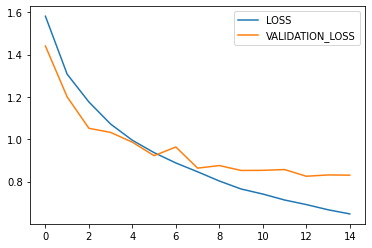

In [ ]:
Plot Loss per iteration
plt.plot(r.history['loss'],label='LOSS')
plt.plot(r.history['val_loss'],label='VALIDATION_LOSS')
plt.legend()

**Observation**

Here we observe that there is chance of overfitting if number of epochs increases more than 15 the validation loss is on verge of moving up

###Accuracy Per Interation


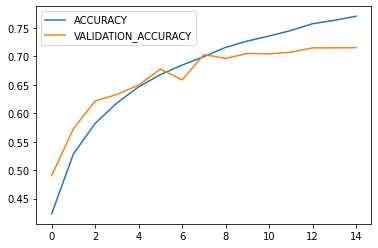

In [ ]:
plt.plot(r.history['accuracy'],label='ACCURACY')
plt.plot(r.history['val_accuracy'],label='VALIDATION_ACCURACY')
plt.legend()

**Observation**

Here we observe that our training accuracy does not converge while our validation accuracy has become pretty much standard .This is another sign of overfitting.So if training accuray is getting higher with any improvement in validation accuracy this means that our model is learning only to match the noise in training set its not learning anything useful

### Confusion Matrix

Confusion matrix, without normalization
[[770  23  34  19  18   9   8   9  64  46]
 [  7 810  10  12   1   9  12   5  29 105]
 [ 61   4 597  87  96  53  39  35  16  12]
 [ 26   4  72 515  66 210  45  39   9  14]
 [ 26   1  61  60 683  42  29  81  12   5]
 [ 16   3  56 166  46 637  18  46   7   5]
 [  9   6  42  84  47  45 741  13   7   6]
 [ 17   1  23  41  62  58   3 776   5  14]
 [ 45  37  10  25   7   6   6   7 830  27]
 [ 31  74   9  16   4  12  11  22  29 792]]


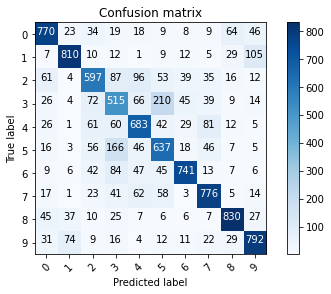

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
#Our model is predicting on x_test and storing answer of prediction in p_test
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))



**Observation Table From above Confusion Matrix**
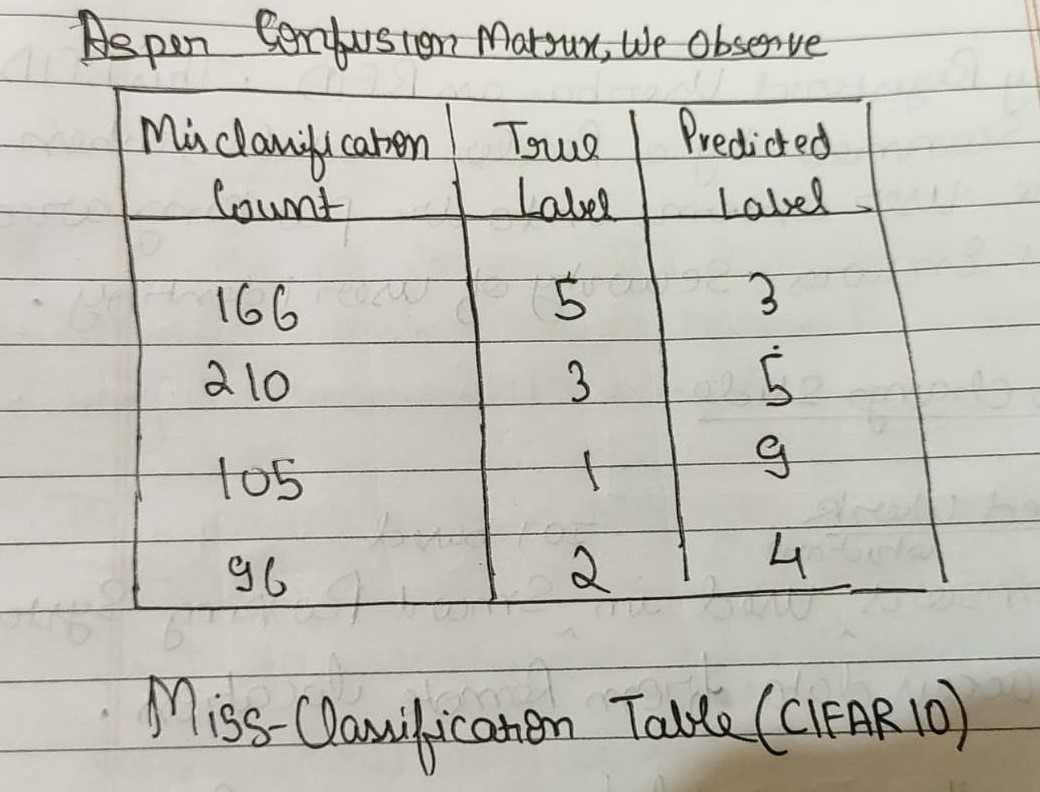

### Label Mapping
#### As we know each label is associated with some numerical value.These are very small images, much smaller than a typical photograph.

####From the above table we see 5 and 3 have highest number of missclassification i.e Image of Dogs and Cats have been most confusing for the model.Main reason for that is that the images have very small size so its difficult to dintinguish between them 


#### 1 and 9 have been misclassified i.e automobile and truck very much possible as they are difficult to classify 

#### 2 and 4 i.e bird and deer 

0. airplane
1. automobile
2. bird
3. cat
4. deer
5. dog
6. frog
7. horse
8. ship
9. truck


### Let's See Some Miss-classifications

In [ ]:
labels='''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split("\n")

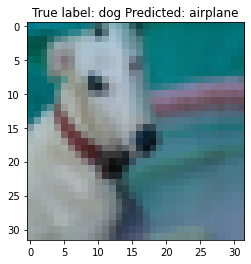

In [ ]:
misclassified_idx = np.where( p_test != y_test )[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i],cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

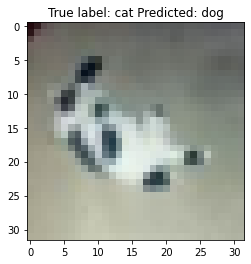

In [ ]:
misclassified_idx = np.where( p_test != y_test )[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i],cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

#Really Confusing to identify Even for a Human if its cat or dog apart from that quality of image is also poor so its difficult to know its a Cat or a Dog

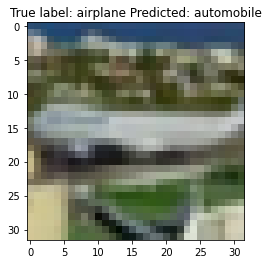

In [ ]:
misclassified_idx = np.where( p_test != y_test )[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i],cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));
#What's This ! Not easy to classify

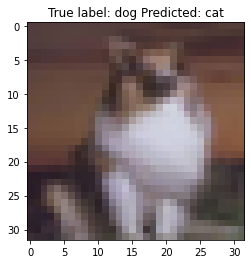

In [ ]:
misclassified_idx = np.where( p_test != y_test )[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i],cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

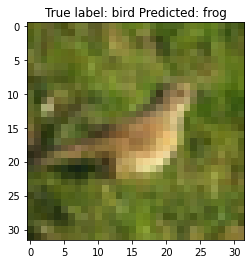

In [ ]:
misclassified_idx = np.where( p_test != y_test )[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i],cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));